# In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

## Objective:    What will be predicted score if a student study for 9.25 hrs in a day?

In [2]:
#importing library for data retrieving and ploting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
#retrieving data from url
remote_data = 'http://bit.ly/w-data'
students_data = pd.read_csv(remote_data)

#Describing data
print(students_data.describe())

# To show first 10 data
students_data.head(10)

           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# Plotting

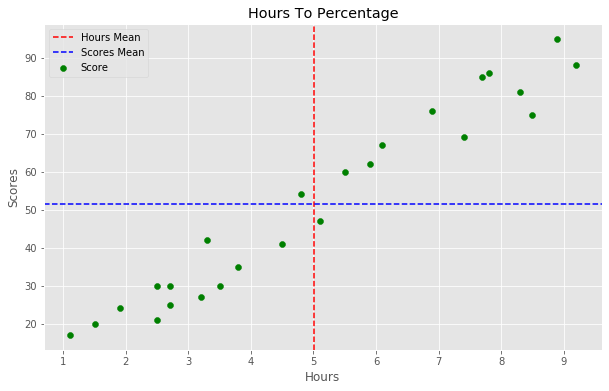

In [18]:
#plotting the distribution of scores

#plot style
plt.style.use('ggplot') 

#plotting scattered graph
fig, ax = plt.subplots(figsize = (10,6))
scatter = ax.scatter(x = students_data['Hours'],
                    y = students_data['Scores'],
                    c = 'Green')

#setting Titles and lables
ax.set(title = 'Hours To Percentage',
      xlabel = 'Hours',
      ylabel = 'Scores')

#Dotted vertical and horizontal mean of Hours and Scores
hours_mean = ax.axvline(students_data['Hours'].mean(),
                        linestyle = '--',
                        c = 'Red')
scores_mean = ax.axhline(students_data['Scores'].mean(),
                         linestyle = '--',
                         c = 'Blue' )

#adding legend
plt.legend(('Hours Mean','Scores Mean','Score'))

plt.show()

## Preparing the data